# TP3 : Density estimation

## Lab session

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#standard gaussian to estimate
def reference(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

### Question 1 : Create four functions $K1,K2,K3,K4$ corresponding respectively to uniform, triangle, Epanechnikov and Gaussian kernels.

In [8]:
def K1(x):
    'Uniform'
    return 0.5*(x>=-1 and x<=1)

def K2(x):
    'Triangle'
    return ((1-abs(x))*(x>=-1 and x<=1))
    
def K3(x):
    'Epanechnikov'
    return (0.75*(1-x**2)*(x>=-1 and x<=1))

def K4(x):
    'Gaussian'
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

### Question 2 : Create a function "PlotK(funct,xmin,xmax,pas,col)" with input a function"funct" of one argument, three numbers "xmin, xmax, step" and a letter "col". This function will return the graph of "funct" according to the input parameters. Subsequently, create a function "AllplotK(xmin,xmax,pas,col1,col2,col3,col4)" plotting the four kernels on a same graph with a legend and colors specified in input. Test for a few input values.

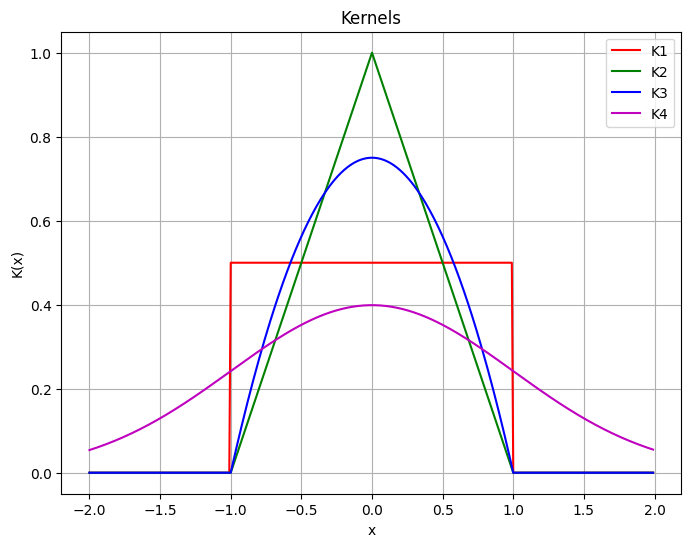

In [13]:
def PlotK(funct,xmin,xmax,pas,col):
    x = np.arange(xmin, xmax, pas)
    y = np.array([funct(xi) for xi in x])
    plt.plot(x, y, color=col, label=funct.__name__)

            
def AllplotK(xmin,xmax,pas,col1,col2,col3,col4):
    plt.figure(figsize=(8, 6))
    
    PlotK(K1, xmin, xmax, pas, col1)
    PlotK(K2, xmin, xmax, pas, col2)
    PlotK(K3, xmin, xmax, pas, col3)
    PlotK(K4, xmin, xmax, pas, col4)
    
    plt.legend()
    plt.title("Kernels")
    plt.xlabel("x")
    plt.ylabel("K(x)")
    plt.grid()
    plt.show()

# Exemple d'utilisation
AllplotK(-2, 2, 0.01, "r", "g", "b", "m")
        

### Question 3 : Generate a realization of size $n$ of $X$ according to a standard Gaussian law. ($n$ is currently set at $100$ in the script).

In [32]:
n=100
X=np.random.randn(n)
print(X)

[-1.97176288  1.3263235  -0.1496526  -1.51190642  1.04471945 -0.50903658
  0.59085874  1.6317307   0.15630868  0.19714184 -1.69983443 -1.08020666
  0.45560623 -1.30542045  1.19462662  2.27788867 -0.61623179  0.65518422
  0.02984316  0.0744653   0.34977993 -0.82251333 -1.33920353  0.63622156
  1.36848622 -1.24549309 -0.46684174 -0.53728234  1.00760771  0.53246367
  0.38882749  0.40812032 -1.42179764  0.92086471 -1.81253856 -1.108677
 -0.13715521 -0.63306223 -0.37942414 -0.96001616 -1.3315267   0.05834982
  0.15080574 -0.41114851  0.69356035 -0.43308941 -0.7342303  -0.68007503
  0.92631156  0.77090368  1.34631335 -0.55263047 -0.10642295  0.3804931
  0.17573014  1.33970766  0.16424168 -0.74370112 -0.66399794 -1.07119088
 -0.27591335 -0.72854659  0.15743336  0.66125297  0.40539677 -0.9744141
  0.4484389   0.31265276  0.19299651  0.56813023  1.07954503  0.24903084
  1.47552083 -1.72919424  0.62581738 -0.0615498  -1.14762031 -3.40311458
 -0.32033638  0.64466985 -0.73200064 -1.57903293  0.657

### Question 4 : Define "fchapeau(funct,h,x)"with argument "funct", window "h" and real "x" and returns the image of "x" by $\widehat{f}_h$. 

In [51]:
def fchapeau(funct,h,x,X, n): 
        somme=0
        for i in range(n):
                somme+=1/h*funct((x-X[i])/h)
        return somme*1/n
    

### Question 5 : Represent on the same chart the reference function as well as the four $\widehat{f}_h$ functions obtained with the $K1,K2,K3,K4$ kernels. For this question, set $h=2$.

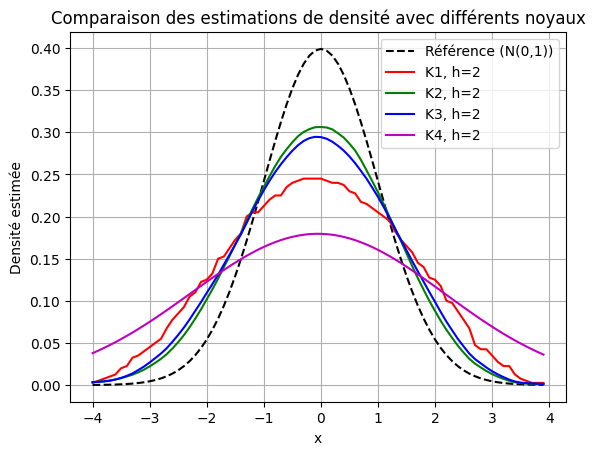

In [52]:
def Plotfchap(funct,h,xmin,xmax,pas,col,X,n): 
    x_vals = np.arange(xmin, xmax, pas)
    y_vals = [fchapeau(funct, h, x, X,n) for x in x_vals]
    plt.plot(x_vals, y_vals, color=col, label=f"{funct.__name__}, h={h}")
    
def Allplotfchapeau(h1,h2,h3,h4,xmin,xmax,pas,col1,col2,col3,col4,colref,X,n):
    x_vals = np.arange(xmin, xmax, pas)
    plt.plot(x_vals, reference(x_vals), color=colref, linestyle="dashed", label="Référence (N(0,1))")

    Plotfchap(K1, h1, xmin, xmax, pas, col1,X,n)
    Plotfchap(K2, h2, xmin, xmax, pas, col2,X,n)
    Plotfchap(K3, h3, xmin, xmax, pas, col3,X,n)
    Plotfchap(K4, h4, xmin, xmax, pas, col4,X,n)

    plt.legend()
    plt.title("Comparaison des estimations de densité avec différents noyaux")
    plt.xlabel("x")
    plt.ylabel("Densité estimée")
    plt.grid()
    plt.show()


# Paramètres
h = 2
xmin, xmax, pas = -4, 4, 0.1
col1, col2, col3, col4, colref = "r", "g", "b", "m", "black"

# Exécution du tracé
Allplotfchapeau(h,h,h,h, xmin, xmax, pas, col1, col2, col3, col4, colref,X,n)
        

### Question 6 : Same for $h=1$. Comment.

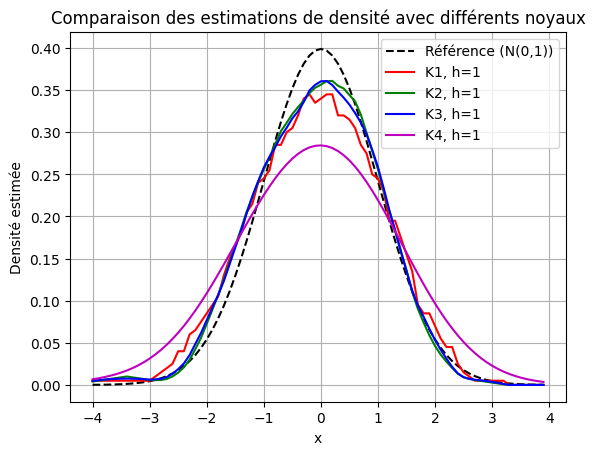

In [53]:
h1=1
Allplotfchapeau(h1,h1,h1,h1, xmin, xmax, pas, col1, col2, col3, col4, colref,X,n)

We observe that the estimation is closer to the reference density when reducing h to 1. Qualitatively, the estimation differs significantly when varying the window h.

### Question 7 : Redo questions 5 and 6 with
### \begin{align*} (n,h)\in \{(10,2),(10,1),(1000,2),(1000,1)\}.\end{align*} Comment.

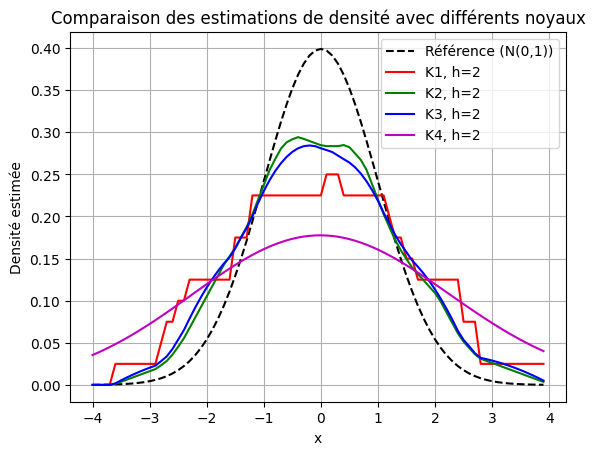

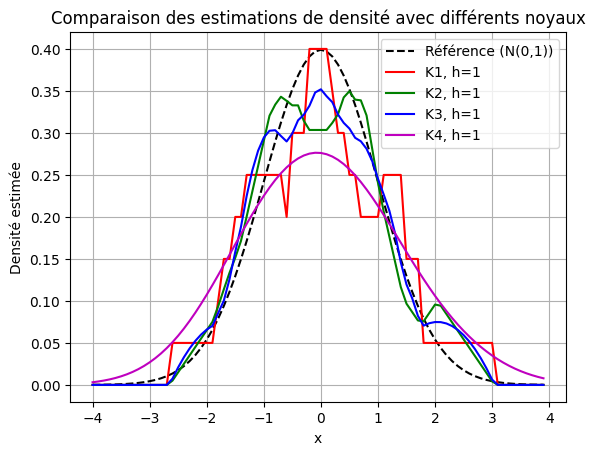

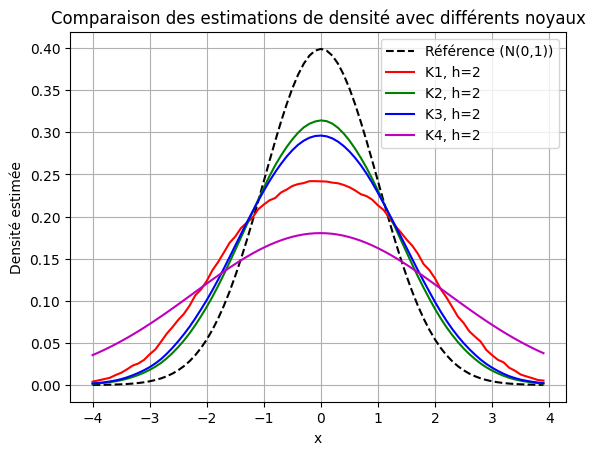

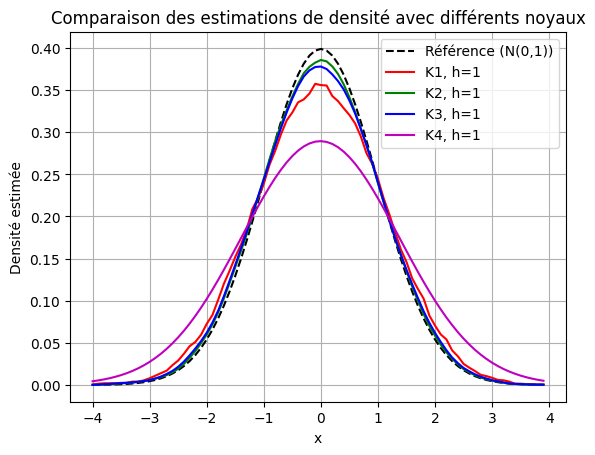

In [55]:
n1 = 10
X1=np.random.randn(n1)
Allplotfchapeau(h,h,h,h, xmin, xmax, pas, col1, col2, col3, col4, colref,X1,n1)
Allplotfchapeau(h1,h1,h1,h1, xmin, xmax, pas, col1, col2, col3, col4, colref,X1,n1)
n2 = 1000
X2=np.random.randn(n2)
Allplotfchapeau(h,h,h,h, xmin, xmax, pas, col1, col2, col3, col4, colref,X2,n2)
Allplotfchapeau(h1,h1,h1,h1, xmin, xmax, pas, col1, col2, col3, col4, colref,X2,n2)

### Question 8 : Define "SCE(funct,h,f)" with input "funct", a function "f", a window "h" and returns the sum of squared differences between "funct" and "f" ("f" is the reference and "funct" is the estimation).

In [90]:
def SCE(funct,h,X):
    x_vals = np.linspace(-4, 4, 100)  # Discrétisation de l'axe x pour l'évaluation
    sce = np.sum((fchapeau(funct, h, x, X,n) - reference(x))**2 for x in x_vals)
    return sce



        

In [91]:
h_test = 2
sce_K1 = SCE(K1, h_test, X)
sce_K2 = SCE(K2, h_test, X)
sce_K3 = SCE(K3, h_test, X)
sce_K4 = SCE(K4, h_test, X)

# Affichage des résultats
print(f"SCE pour K1 (Uniforme): {sce_K1:.4f}")
print(f"SCE pour K2 (Triangle): {sce_K2:.4f}")
print(f"SCE pour K3 (Epanechnikov): {sce_K3:.4f}")
print(f"SCE pour K4 (Gaussien): {sce_K4:.4f}")

SCE pour K1 (Uniforme): 0.4817
SCE pour K2 (Triangle): 0.1522
SCE pour K3 (Epanechnikov): 0.2103
SCE pour K4 (Gaussien): 0.9949


### Question 9 : Create a function "thebesth" that takes a function (the kernel in question) and another function $f$ (the reference) into parameters and returns the index divided by $100$ of the minimum list $\{SCE(k/100)\}_{1\le k\le 200}$.

In [94]:
def thebesth(X,funct,H):
    best_h = None
    best_sce = float("inf")  # Initialisation avec une grande valeur

    for h in H:
        sce = SCE(funct, h, X)  # Calcul de la SCE pour h donné
        if sce < best_sce:
            best_sce = sce
            best_h = h  # Mise à jour du meilleur h

    return best_h, best_sce

In [95]:
# Définition des valeurs de h à tester
H_values = np.linspace(0.1, 2, 20)  # Valeurs de h entre 0.1 et 2 avec 20 points

# Recherche du meilleur h pour chaque noyau
best_h_K1, best_sce_K1 = thebesth(X, K1, H_values)
best_h_K2, best_sce_K2 = thebesth(X, K2, H_values)
best_h_K3, best_sce_K3 = thebesth(X, K3, H_values)
best_h_K4, best_sce_K4 = thebesth(X, K4, H_values)

# Affichage des résultats
print(f"Meilleur h pour K1 (Uniforme): {best_h_K1:.4f}, SCE = {best_sce_K1:.4f}")
print(f"Meilleur h pour K2 (Triangle): {best_h_K2:.4f}, SCE = {best_sce_K2:.4f}")
print(f"Meilleur h pour K3 (Epanechnikov): {best_h_K3:.4f}, SCE = {best_sce_K3:.4f}")
print(f"Meilleur h pour K4 (Gaussien): {best_h_K4:.4f}, SCE = {best_sce_K4:.4f}")

Meilleur h pour K1 (Uniforme): 0.7000, SCE = 0.0388
Meilleur h pour K2 (Triangle): 0.9000, SCE = 0.0309
Meilleur h pour K3 (Epanechnikov): 0.8000, SCE = 0.0309
Meilleur h pour K4 (Gaussien): 0.4000, SCE = 0.0320


### Question 10 : Create a function that graphically represents the four density estimates for these four kernels with the windows obtained via the "thebesth" function, and plot the reference density. We keep $n=1000$ for this question.

In [101]:

def best_h(n):
    # Définition des valeurs de h à tester
    H_values = np.linspace(0.1, 2, 20)  # Valeurs de h entre 0.1 et 2 avec 20 points
    
    X2=np.random.randn(n)
    # Recherche du meilleur h pour chaque noyau
    best_h_K1, best_sce_K1 = thebesth(X, K1, H_values)
    best_h_K2, best_sce_K2 = thebesth(X, K2, H_values)
    best_h_K3, best_sce_K3 = thebesth(X, K3, H_values)
    best_h_K4, best_sce_K4 = thebesth(X, K4, H_values)
    Allplotfchapeau(best_h_K1, best_h_K2, best_h_K3, best_h_K4, xmin, xmax, pas, col1, col2, col3, col4, colref, X2, n)



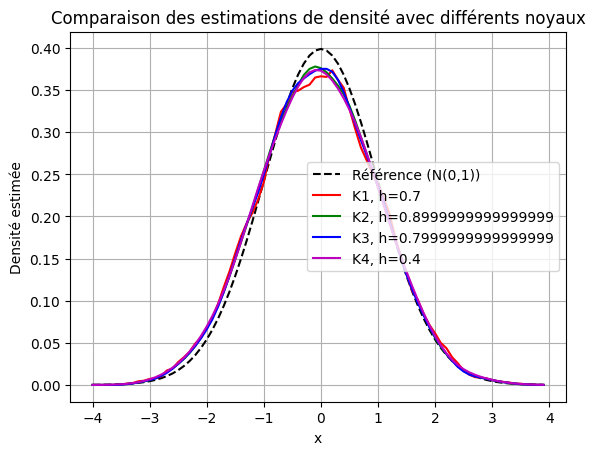

In [102]:
best_h(1000)

### Question 11 : Execute this function with $mu1=0$, $mu2=5$ and $sigma1=sigma2=1$, $N=100$ and $h=0.75$. Choose the "gaussian" kernel.

In [103]:

def estimatedensity(N,h,mu1,sigma1,mu2,sigma2,kernel):
        # generate samples
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # set the x interval
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # mixture
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # density estimation for X
        kde = KernelDensity(kernel=kernel, bandwidth=h).fit(X)   


        # density computation for X_plot
        density = np.exp(kde.score_samples(X_plot))

        # plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='True density')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()            

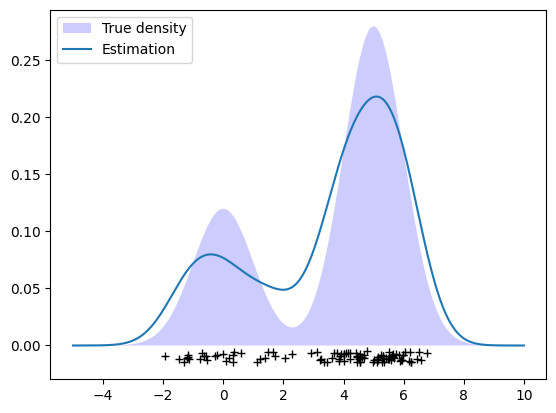

In [107]:
estimatedensity(100,0.75,0,1,5,1,"gaussian")

### Question 12 : Vary $h$.

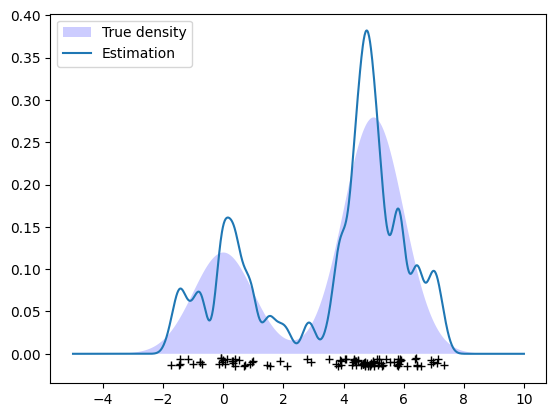

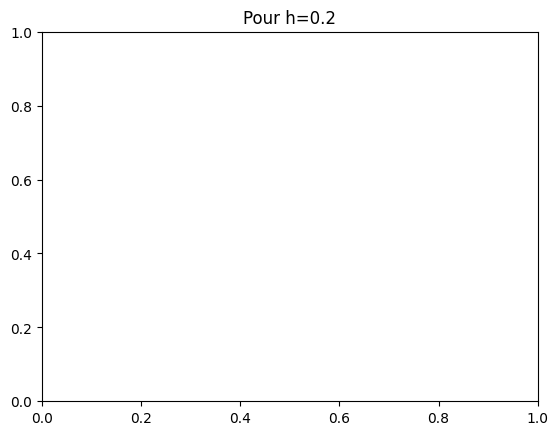

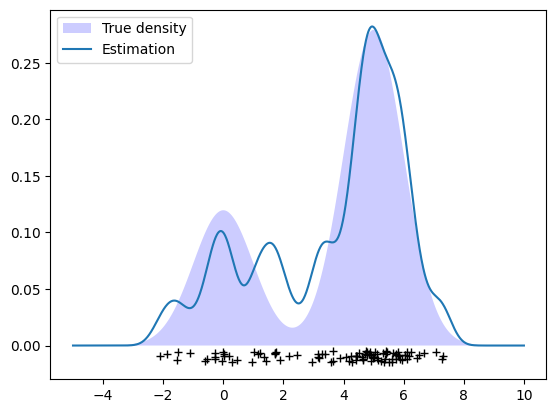

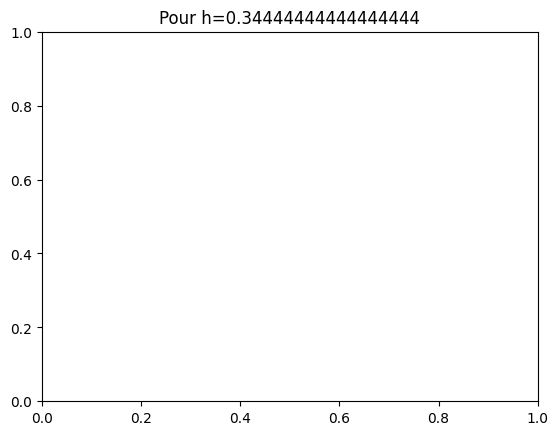

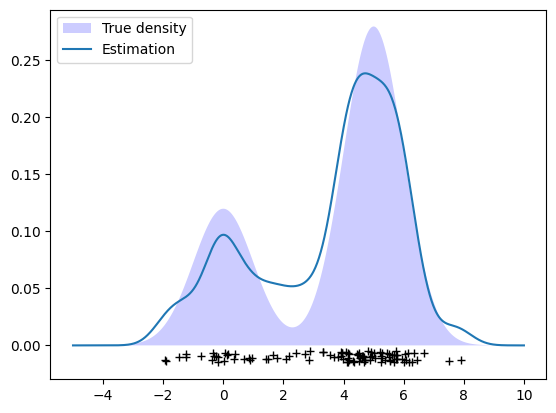

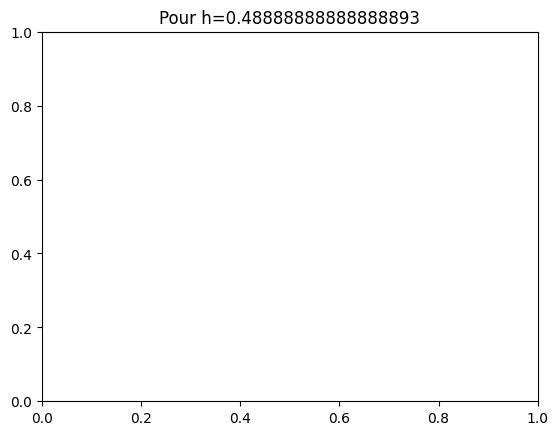

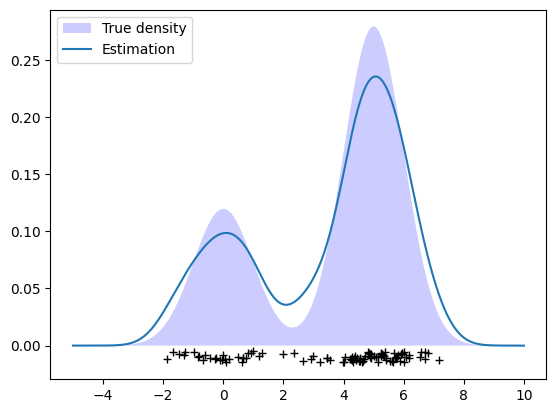

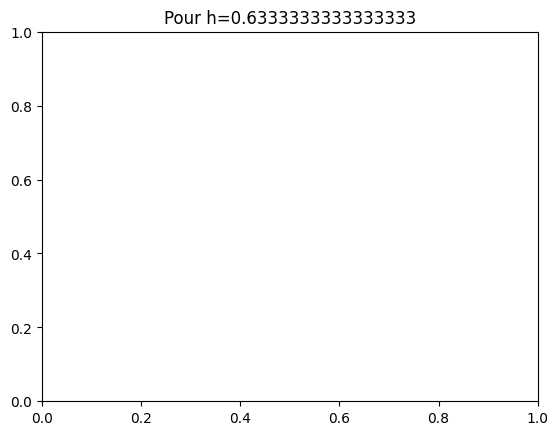

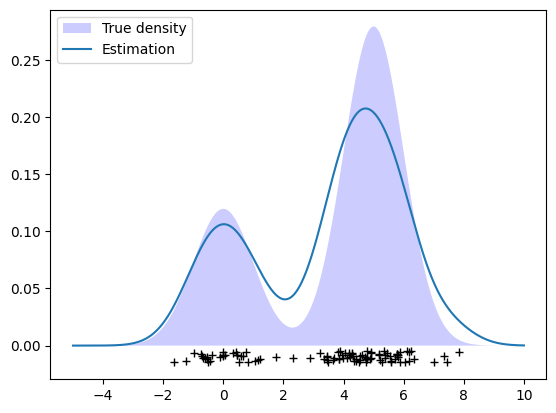

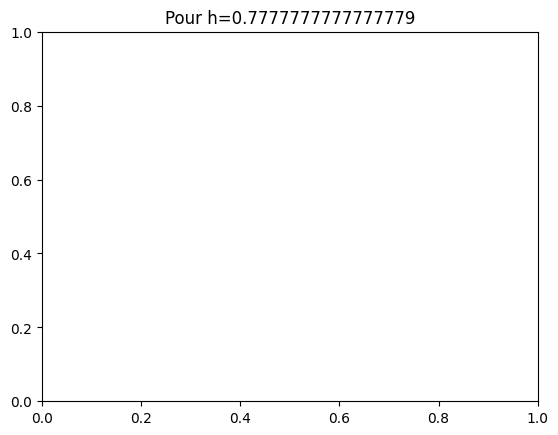

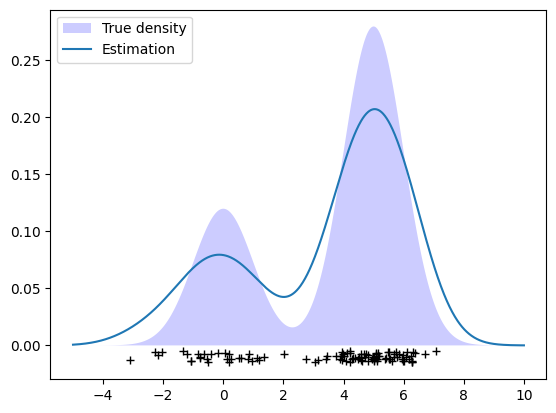

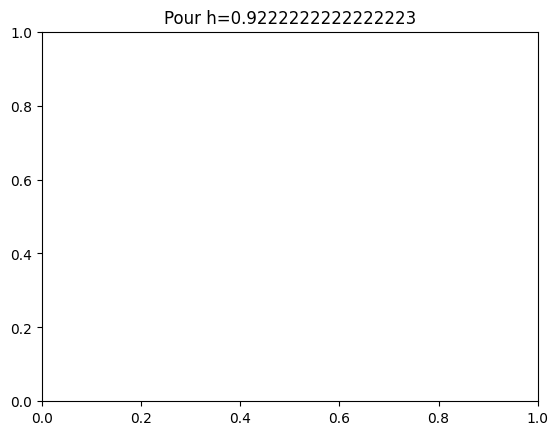

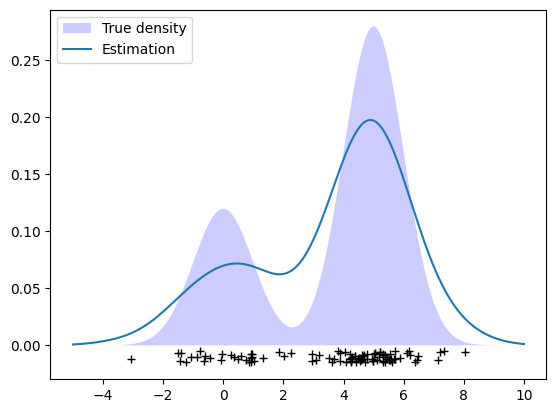

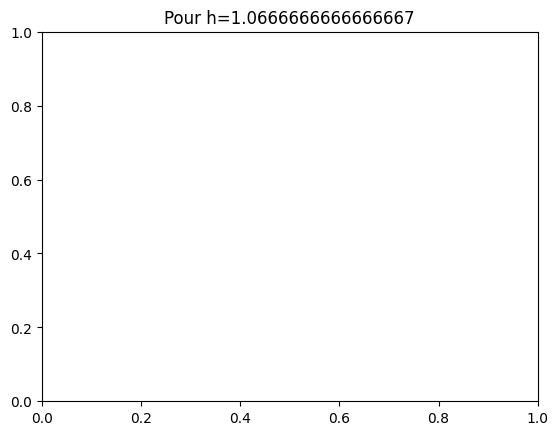

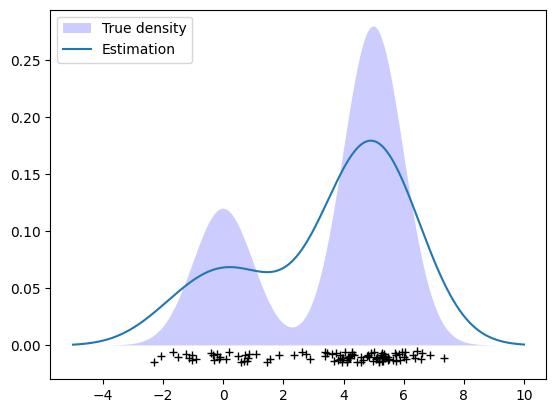

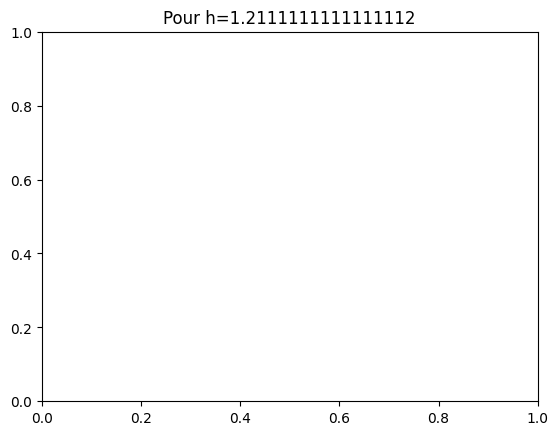

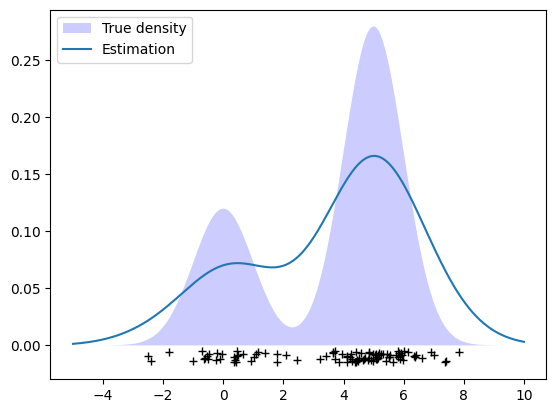

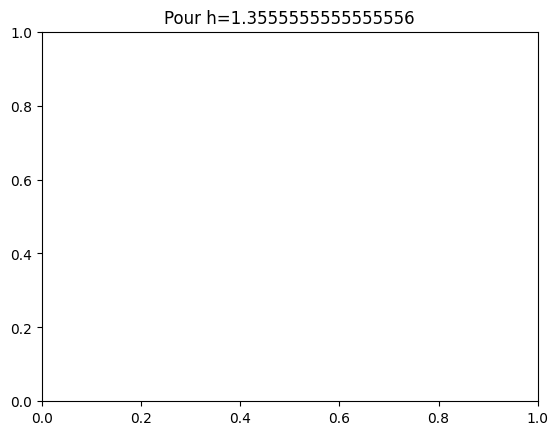

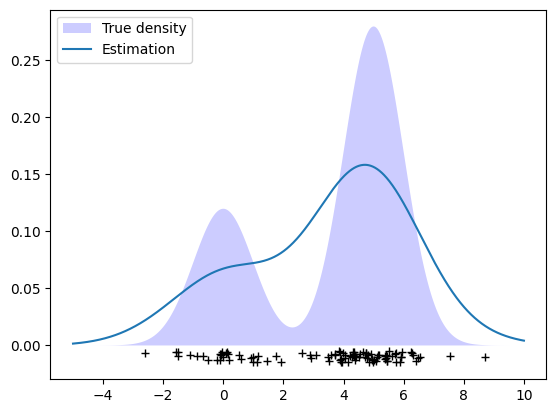

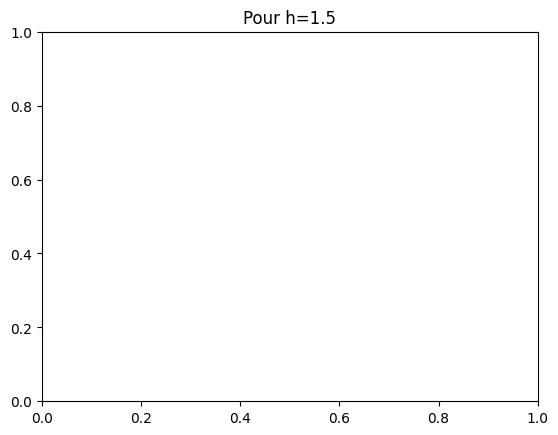

In [119]:
L = np.linspace(0.2,1.5,10)
for i in L:
    estimatedensity(100,i,0,1,5,1,"gaussian")
    plt.title(f"Pour h={i}")
    plt.show()

By testing values of h between 0.2 and 1.5, the best approximation to the true density is obtained for h = 0.55.
For h > 0.8, we observe that the general shape of the reference density is preserved, but the distribution appears flattened, with values spread more widely along the horizontal axis.

### Question 13 prime :


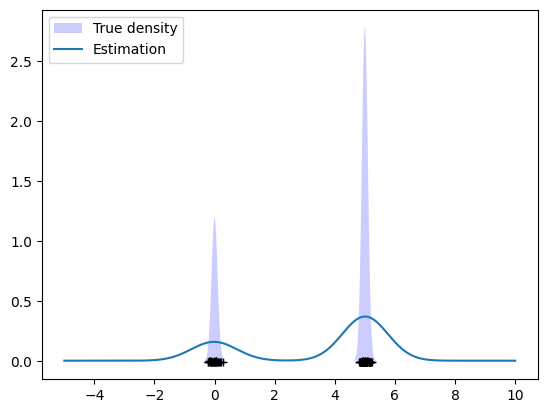

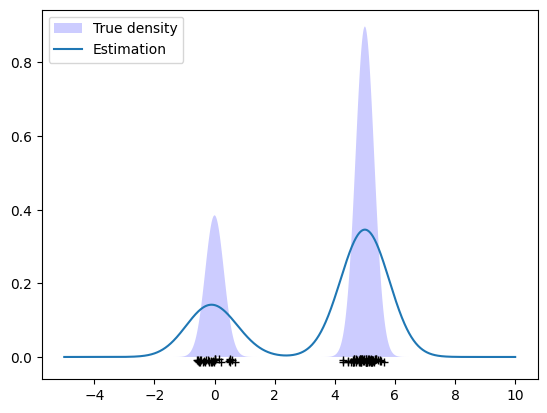

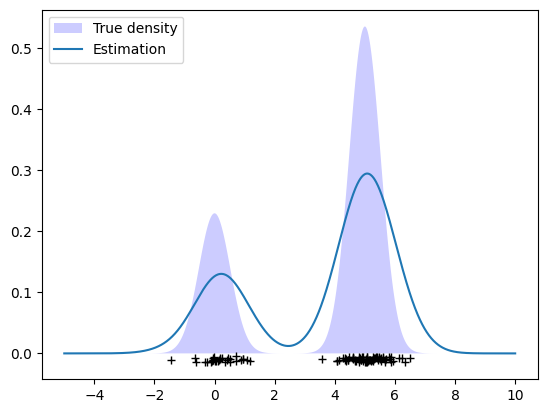

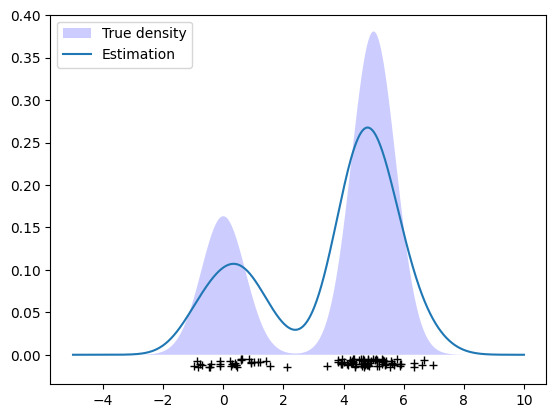

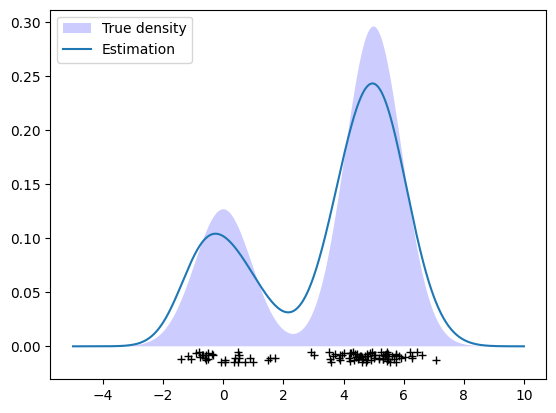

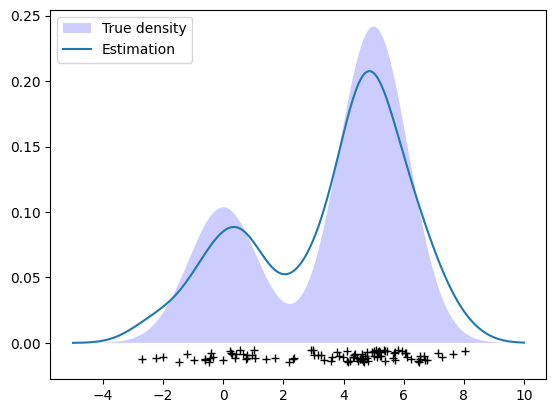

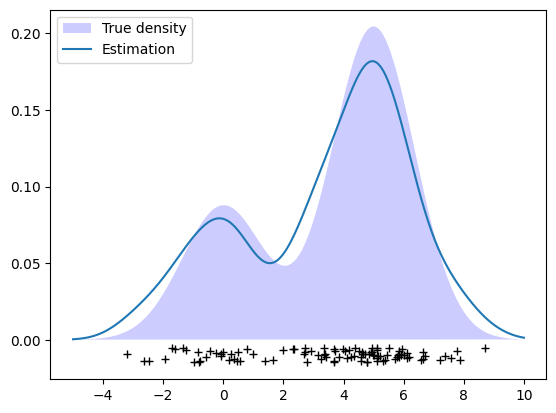

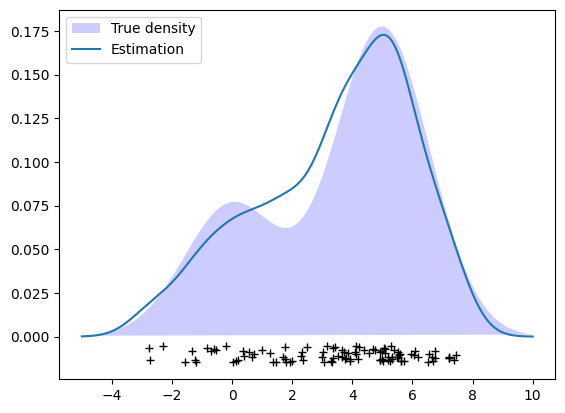

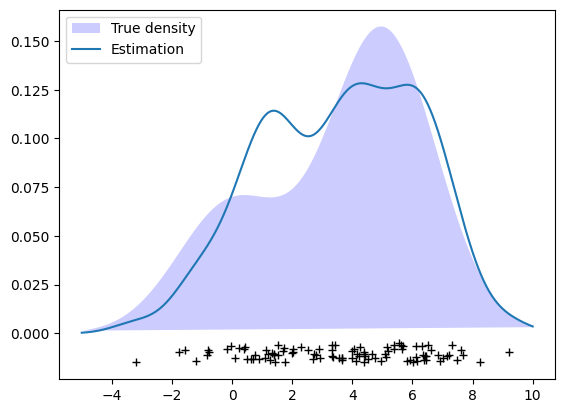

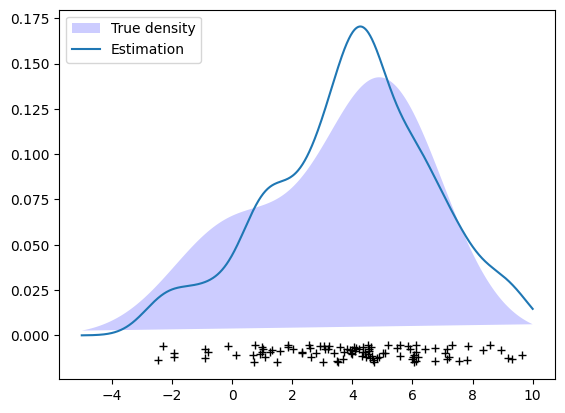

In [110]:
sigma1 = np.linspace(0.1,2,10)
for i in sigma1:
    estimatedensity(100,0.75,0,i,5,i,"gaussian")

When sigma is increasing the estimated shape becomes more and more wide.

### Question 13 : Vary $N$.

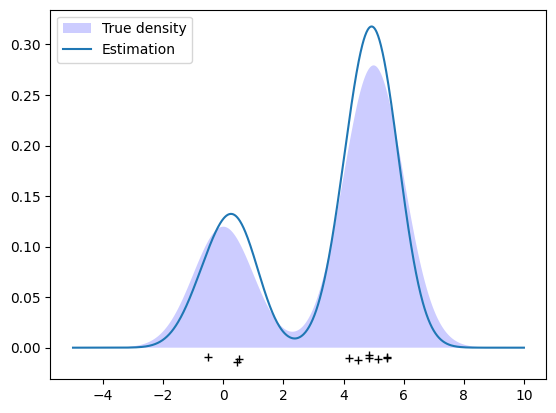

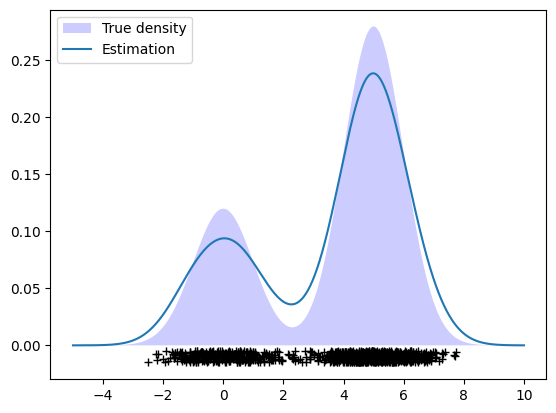

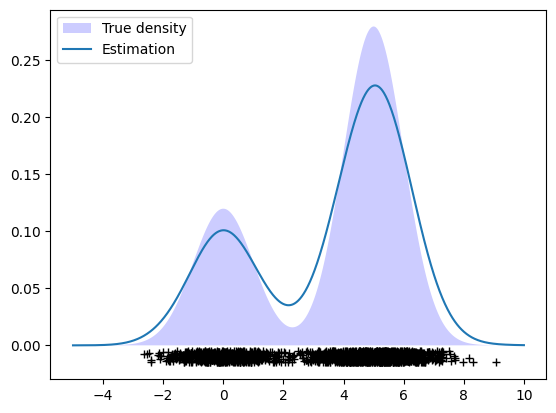

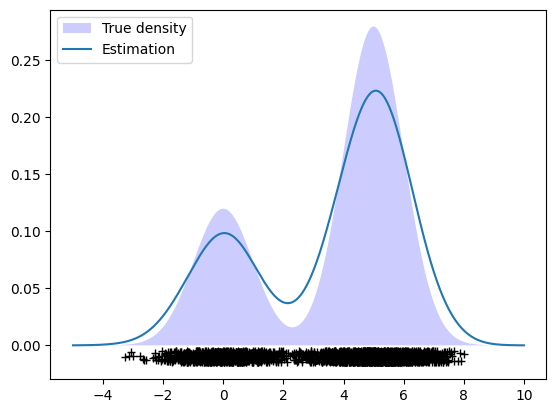

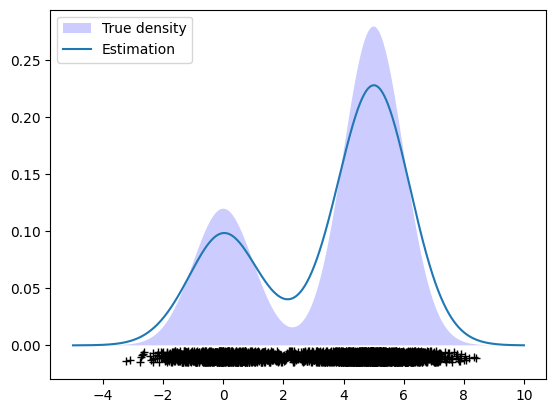

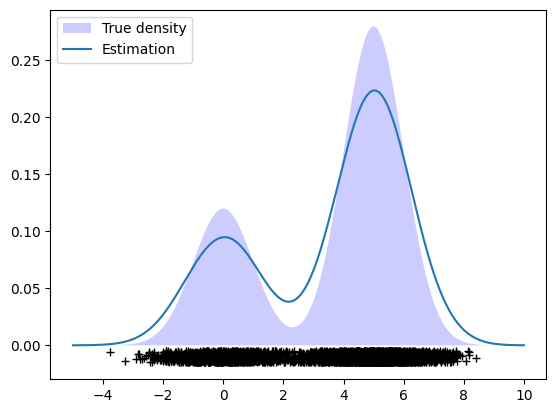

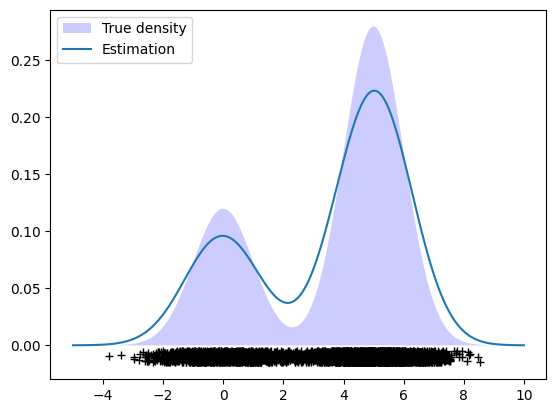

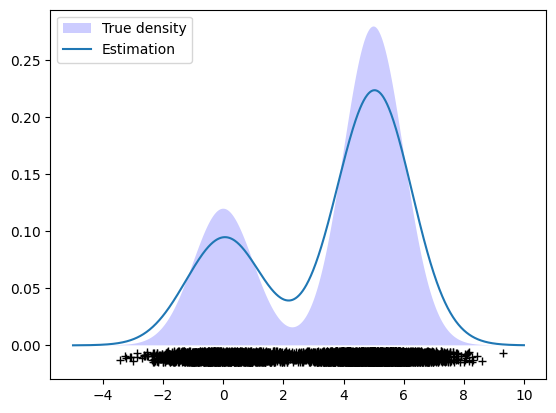

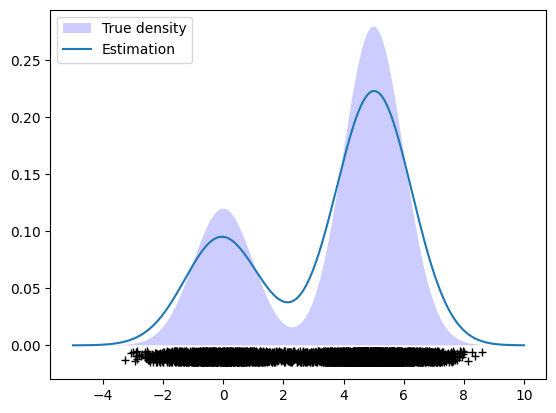

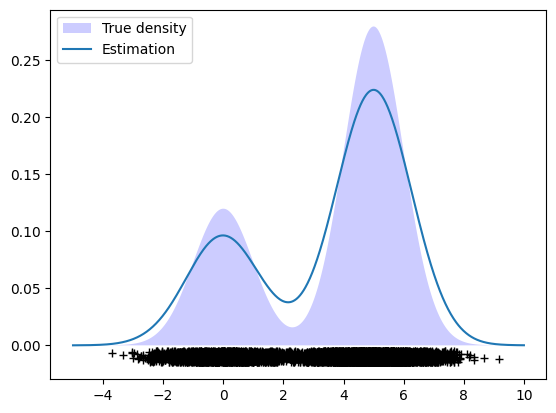

In [111]:
N = np.linspace (10 , 10000, 10 )
for i in N:
    estimatedensity(i,0.75,0,1,5,1,"gaussian")
    

Nothing is changing except for the first figure, because the N is too small.

### Question 14 : Replace 'gaussian' by 'epanechnikov'. Comment

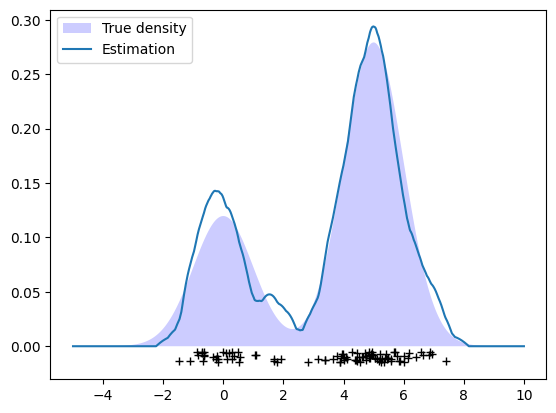

In [120]:
estimatedensity(100,0.75,0,1,5,1,"epanechnikov")

It is observed that with the Epanechnikov kernel, the estimation is less uniform or “smooth” compared to the Gaussian kernel.